In [3]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
from client import Socket
from time import sleep

In [4]:
# connect

s = Socket()

trying to connect to:  raspberrypi.local 5005
connected, use send_recv(msg) to send data


In [7]:
# send angles to servos

def move(angles):
    dat = np.hstack([[1], angles])
    dat[0] = 1
    dat = ",".join(map(str, dat))
    accel = s.send_recv(dat)
    accel = np.array(accel.decode().split(","))
    return accel.astype(np.float)
    
move(np.random.randn(8))

array([-12.32535015,   6.27759675, 107.32008942])

In [11]:
# brain

# new
W = np.random.randn(8, 9)

# load
# W = np.load("brain_trained")

def transform(state, W):
    state = np.hstack([state, np.ones(1)]) # append 1
    z = W.dot(state)
    h = np.tanh(z)
    return h

# test it
state = np.zeros(8)
move(state)
sleep(1)

def move_routine(W):
    global state
    
    accel = np.zeros(3)
    for i in range(3):
        state = transform(state, W)
        accel += move(state)
        
    return accel
        
move_routine(W)

array([ 32.05836023,  -8.55687673, 332.45405413])

In [12]:
# save good start W

np.save("brain_starter", W)
#W = np.load("brain_starter.npy")

In [13]:
# data

diffs = []
rs = []

stand = np.zeros(8)
state = stand.copy()
move(state)
sleep(1)

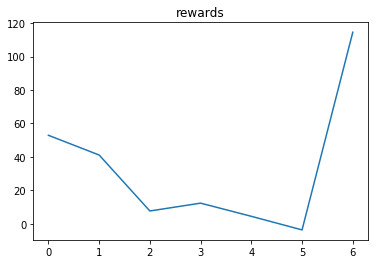

done


In [68]:
# training

for i in range(1):
    # try out a different W
    diff = np.random.randn(W.shape[0], W.shape[1]) * .1
    trialW = W.copy() + diff
    accel = move_routine(trialW)
    r = accel[1]
    rs.append(r)
    diffs.append(diff)
    
plt.title("rewards")
plt.plot(rs)
plt.show()

print("done")

In [61]:
W_orig = W.copy()

In [64]:
print("Training based on {} collected: ".format(len(diffs)))

learning_rate = .3

rs_norm = np.array(rs)
rs_norm -= np.mean(rs_norm)
rs_norm /= np.std(rs_norm)

for i in range(len(diffs)):
    W += diffs[i] * rs_norm[i]

Training based on 6 collected: 


In [151]:
# save brain
np.save('brain_trained', W)

In [65]:
# test it out
for i in range(1):
    move_routine(W)

In [67]:
# reset state if needed

state = stand.copy()
move(state)

array([ 5.59524928,  4.30956299, 99.7975078 ])